# ECE 514 - RECOMMENDER SYSTEM


## Names

* Nikos Angelopoulos (2110)
* Dimitrios Dallas (2412)
* Giorgos Kletsas (2408)


## Libraries Used

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataframe of Users Rating Movies

In [3]:
data = pd.read_csv('ratings.csv')
data.columns=['userId', 'movieId', 'rating', 'timestamp']


df_ratings_new = np.array_split(data,4)
df_ratings = df_ratings_new[0]
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### Clean the data (Drop na)

In [3]:
df_ratings.dropna(how='any',axis=0, inplace=True)

In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## Dataframe with movies' ids, their titles and their genres

In [5]:
movie_titles_genre = pd.read_csv("movies.csv")
movie_titles_genre .dropna(how='any',axis=0, inplace=True)
movie_titles_genre.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Merging the 2 dataframes

In [6]:
df_ratings = df_ratings.merge(movie_titles_genre,on='movieId', how='left')
df_ratings.head(452)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
447,4,589,4.0,840878962,Terminator 2: Judgment Day (1991),Action|Sci-Fi
448,4,594,4.0,840879265,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
449,4,596,4.0,840879424,Pinocchio (1940),Animation|Children|Fantasy|Musical
450,4,733,5.0,840879322,"Rock, The (1996)",Action|Adventure|Thriller


### Average Rating of each movie

In [7]:
Average_ratings = pd.DataFrame(df_ratings.groupby('title')['rating'].mean())
Average_ratings.head(10)

,rating
title,
"""Great Performances"" Cats (1998)",2.566667
#chicagoGirl: The Social Network Takes on a Dictator (2013),5.000000
$ (Dollars) (1971),3.250000
$5 a Day (2008),2.558824
$9.99 (2008),3.000000
$ellebrity (Sellebrity) (2012),0.500000
'71 (2014),3.363636
'Hellboy': The Seeds of Creation (2004),2.833333
"'Human' Factor, The (Human Factor, The) (1975)",1.000000


### Total Number Of Ratings

In [8]:
Average_ratings['Total Ratings'] = pd.DataFrame(df_ratings.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
"""Great Performances"" Cats (1998)",2.566667,45
#chicagoGirl: The Social Network Takes on a Dictator (2013),5.000000,1
$ (Dollars) (1971),3.250000,6
$5 a Day (2008),2.558824,17
$9.99 (2008),3.000000,12
$ellebrity (Sellebrity) (2012),0.500000,1
'71 (2014),3.363636,11
'Hellboy': The Seeds of Creation (2004),2.833333,18
"'Human' Factor, The (Human Factor, The) (1975)",1.000000,1


## Recommender system based on correllation

In [9]:
movie_user = df_ratings.pivot_table(index='userId',columns='title',values='rating')
movie_user.head(10)

title,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),...,eXistenZ (1999),iSteve (2013),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),Árido Movie (2005)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explanation of the algorithm

* **3 people have seen "Toy Story 1".**
* **All of them have rated it high. The 2 of them have seen "Toy Story 2" and rated it high too.**
* **This algorithm recommends "Toy Story 2" to the other person.**

### Example 1 (Toy Story (1995)

In [10]:
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head()

C:\Users\User\.conda\envs\pep_env\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\User\.conda\envs\pep_env\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
"Great Performances" Cats (1998)                              -0.296913
#chicagoGirl: The Social Network Takes on a Dictator (2013)         NaN
$ (Dollars) (1971)                                             1.000000
$5 a Day (2008)                                               -0.050443
$9.99 (2008)                                                  -0.526152
dtype: float64

In [11]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head(400)

,Correlation,Total Ratings
title,,
"""Great Performances"" Cats (1998)",-0.296913,45
$ (Dollars) (1971),1.000000,6
$5 a Day (2008),-0.050443,17
$9.99 (2008),-0.526152,12
'71 (2014),0.043786,11
...,...,...
Aftershock (Tangshan dadizhen) (2010),1.000000,3
Afterwards (2008),-1.000000,3
Against All Odds (1984),0.197578,166


#### Test the recomender system

In [12]:
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

In [13]:
recc = recc.merge(movie_titles_genre,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,Toy Story (1995),1.000000,12338,1,Adventure|Animation|Children|Comedy|Fantasy
1,Toy Story 2 (1999),0.752857,5658,3114,Adventure|Animation|Children|Comedy|Fantasy
2,Angels with Dirty Faces (1938),0.550502,105,8600,Crime|Drama
3,"Monsters, Inc. (2001)",0.542474,5893,4886,Adventure|Animation|Children|Comedy|Fantasy
4,Toy Story 3 (2010),0.538419,1451,78499,Adventure|Animation|Children|Comedy|Fantasy|IMAX
5,"Bug's Life, A (1998)",0.527273,5053,2355,Adventure|Animation|Children|Comedy
6,Finding Nemo (2003),0.522760,5917,6377,Adventure|Animation|Children|Comedy
7,Lorenzo's Oil (1992),0.505024,145,7009,Drama
8,Jungle Book (1942),0.499659,231,6743,Adventure|Fantasy
9,Ben-Hur: A Tale of the Christ (1925),0.496299,210,6986,Adventure|Drama


### Example 2 (Movie - Harry Potter and the Chamber of Secrets (2002))

In [14]:
correlations = movie_user.corrwith(movie_user['Harry Potter and the Chamber of Secrets (2002)'])
correlations.head()

title
"Great Performances" Cats (1998)                               0.527281
#chicagoGirl: The Social Network Takes on a Dictator (2013)         NaN
$ (Dollars) (1971)                                                  NaN
$5 a Day (2008)                                                     NaN
$9.99 (2008)                                                        NaN
dtype: float64

In [15]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation = recommendation.join(Average_ratings['rating'])
recommendation.head()

,Correlation,Total Ratings,rating
title,,,
"""Great Performances"" Cats (1998)",0.527281,45,2.566667
'71 (2014),0.098595,11,3.363636
'Hellboy': The Seeds of Creation (2004),1.000000,18,2.833333
'R Xmas (2001),-0.052414,10,2.650000
'Round Midnight (1986),0.043529,38,3.434211


In [16]:
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

In [17]:
recc = recc.merge(movie_titles_genre,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,rating,movieId,genres
0,Harry Potter and the Chamber of Secrets (2002),1.000000,3640,3.553434,5816,Adventure|Fantasy
1,Harry Potter and the Sorcerer's Stone (a.k.a. ...,0.858498,4327,3.610469,4896,Adventure|Children|Fantasy
2,Harry Potter and the Goblet of Fire (2005),0.788580,2503,3.732920,40815,Adventure|Fantasy|Thriller|IMAX
3,Harry Potter and the Prisoner of Azkaban (2004),0.786052,3357,3.731903,8368,Adventure|Fantasy|IMAX
4,My Crazy Life (Mi vida loca) (1993),0.748939,146,3.462329,269,Drama
5,Harry Potter and the Order of the Phoenix (2007),0.743393,1521,3.749178,54001,Adventure|Drama|Fantasy|IMAX
6,Love Jones (1997),0.712554,101,3.455446,1477,Romance
7,Bogus (1996),0.703132,166,2.551205,885,Children|Drama|Fantasy
8,Harry Potter and the Half-Blood Prince (2009),0.694547,1085,3.822120,69844,Adventure|Fantasy|Mystery|Romance|IMAX
9,Harry Potter and the Deathly Hallows: Part 2 (...,0.686577,989,3.972194,88125,Action|Adventure|Drama|Fantasy|Mystery|IMAX


## Content-based filtering Recommender system

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [13]:
df_ratings_2 = np.array_split(df_ratings,500)
df_ratings_sig = df_ratings_2[0]

### TfidVectorizer 
* Is a model that helps split the words that define the genre of the movie

In [14]:
tfv = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfv_matrix = tfv.fit_transform(movie_titles_genre['genres'])
tfv_matrix.shape

(27278, 189)

### Linear-kernel
* Defines the similarity between two vectors

In [15]:
cosine_sim = linear_kernel(tfv_matrix,tfv_matrix)

In [16]:
titles = movie_titles_genre['title']
indices = pd.Series(movie_titles_genre.index, index=movie_titles_genre['title'])

**Recommendation Function**
* that returns recommendations based on similarity scores

In [20]:
def give_rec(title):
    
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:20]


    movie_indices = [i[0] for i in sim_scores]

    return titles.iloc[movie_indices]

### Example 1 (Toy Story (1995))

In [25]:
give_rec('Toy Story (1995)').head(20)

2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
21355                                         Turbo (2013)
24092                                       Aladdin (1992)
24156                                Boxtrolls, The (2014)
24458            Toy Story Toons: Hawaiian Vacation (2011)
24460                    Toy Story Toons: Small Fry (2011)
24849                             The Magic Crystal (2011)
27270                                Brother Bear 2 (200

* We notice that the recommendations are mainly Animation movies.

### Example 2 (Seven (a.k.a. Se7en) (1995))

In [27]:
give_rec("Seven (a.k.a. Se7en) (1995)").head(20)

254                                     Just Cause (1995)
331                                     Underneath (1995)
683                                     True Crime (1996)
887                                    Rear Window (1954)
1422                                Absolute Power (1997)
2120                                      Saboteur (1942)
2135                                       Murder! (1930)
2182                               Mortal Thoughts (1991)
3132                               Pacific Heights (1990)
3356                            Eyes of Laura Mars (1978)
3466                                    Jennifer 8 (1992)
4132                                       Memento (2000)
4341                                     Obsession (1976)
4594    Cat o' Nine Tails, The (Gatto a nove code, Il)...
4612                                   Liebestraum (1991)
4712                                Vanishing, The (1993)
4836                               Dressed to Kill (1980)
5344          

* We notice that the recommendations are mainly Crime movies.

## Popularity-based Recommender system
* Based on the votes and ratings of the users

In [14]:
from sklearn import preprocessing

**Transform features by scaling each feature to a given range.[0-1]**

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
movies_scaled = min_max_scaler.fit_transform(Average_ratings[['rating', 'Total Ratings']].where(Average_ratings['Total Ratings']>100))
movies_norm = pd.DataFrame(movies_scaled, columns=['rating', 'Total Ratings'])
movies_norm.head()

,rating,Total Ratings
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [19]:
df_ratings[['avg_rating', 'avg_Total Ratings']] = movies_norm*10
df_ratings['score'] = df_ratings['avg_rating'] * 0.5 + df_ratings['avg_Total Ratings'] * 0.5
df_ratings_scored= df_ratings.sort_values(['score'], ascending=False)
df_ratings_scored[['title', 'avg_rating', 'avg_Total Ratings', 'score']].head(20)

,title,avg_rating,avg_Total Ratings,score
15975,Swordfish (2001),10.000000,9.456090,9.728045
14451,Beauty and the Beast (1991),9.179976,10.000000,9.589988
6679,Strangers on a Train (1951),8.780909,9.886158,9.333534
16146,Batman Forever (1995),9.217627,9.363330,9.290478
16841,White Squall (1996),9.252520,8.174316,8.713418
15621,Basic Instinct (1992),9.584110,7.509336,8.546723
11645,Breakfast at Tiffany's (1961),9.209868,7.690037,8.449953
2683,Star Trek III: The Search for Spock (1984),8.818342,7.980364,8.399353
19010,Finding Nemo (2003),9.700040,6.996747,8.348394
9746,"Frighteners, The (1996)",7.732068,8.941694,8.336881


### Plot the recommendations

Text(0, 0.5, 'Movie Title')

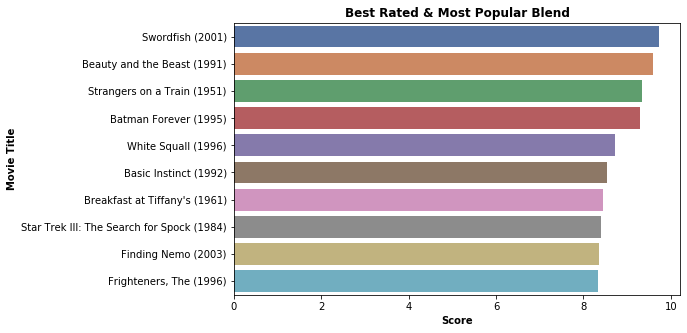

In [30]:
scored =  df_ratings.sort_values('score', ascending=False)


plt.figure(figsize=(8,5))
ax = sns.barplot(x=scored['score'].head(10), y=scored['title'].head(10), data=scored, palette='deep')

plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

## Recommender system with kNN

In [7]:
df_movie_features = df_ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
df_movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,34386,34387,34388,34389,34390,34391,34392,34393,34394,34395
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,3.0,4.0,0.0,4.0,4.0,4.0,0.0,4.0,4.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0


In [8]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(df_movie_features.values)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [20]:
query_index = np.random.choice(df_movie_features.shape[0])
distances, indices = model_knn.kneighbors(np.array(df_movie_features.iloc[query_index, :]).reshape(1, -1), n_neighbors = 6)

In [21]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_ratings['title'].iloc[df_movie_features.index[query_index]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_ratings['title'].iloc[df_movie_features.index[indices.flatten()[i]]], distances.flatten()[i]))

Recommendations for Seven (a.k.a. Se7en) (1995):

1: Rumble in the Bronx (Hont faan kui) (1995), with distance of 0.5452426347053084:
2: Moulin Rouge (2001), with distance of 0.5828873281262256:
3: Where the Buffalo Roam (1980), with distance of 0.586133718499771:
4: Star Kid (1997), with distance of 0.6039801583049859:
5: All Dogs Go to Heaven 2 (1996), with distance of 0.6059130485982707:
